# Lesson 3: Statistical Fundamentals (Part 1)
## Starter code for guided practice & demos
Topics covered:

#### 1. Codealong: Summary statistics in pandas
- Basic stats (min, max, mean, median, mode, count)
- Box plots (interquartile range, quantiles, outliers)
- Standard deviation, variance, pandas.describe()
- Correlation
- Anscombe's Quartet

#### 2. Demo: Median & mean
- Generating random data using statistical distributions
- Density plots using matplotlib

#### 3. Demo: Skewness & kurtosis
- Normality
- Random seeds

#### 4. Demo: Types of distribution

#### 5. Demo: Dummy variables
- Using masks to randomly divide a dataset into two categories (useful later when we talk about cross-validation)
- Using maps to code categorical variables as numeric
- Using dummy variables to code a single categorical variable of k categories as k-1 dummy variables using `pd.get_dummies()`

<div style='background-color: #fcf2f2; border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;'>
**Warning:** You will need to install ggplot before you run the next cell (run `conda install ggplot` in your shell/Terminal).
<div/>

In [1]:
# Import the modules we'll be using today
from ggplot import mtcars
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics

%matplotlib inline

## Codealong: Summary statistics in pandas
	
Methods available include:

    .min() - Compute minimum value
    .max() - Compute maximum value
    .mean() - Compute mean value
    .median() - Compute median value
    .mode() - Compute mode value(s)
    .count() - Count the number of observations

### Part 1. Basic stats
#### Read in the examples

In [2]:
# This is one way of creating a dataframe, by specifying a dictionary of lists
df = pd.DataFrame({
    'example1': [18, 24, 17, 21, 24, 16, 29, 18],
    'example2': [75, 87, 49, 68, 75, 84, 98, 92],
    'example3': [55, 47, 38, 66, 56, 64, 44, 39]})
df

,example1,example2,example3
0,18,75,55
1,24,87,47
2,17,49,38
3,21,68,66
4,24,75,56
5,16,84,64
6,29,98,44
7,18,92,39


#### Instructor example: Calculate the mean for each coloumn

#### Students: Calculate median, mode, max, min for example

Note: All answers should match your hand calculations

In [16]:
#maximum
df.max()

# Max axross entire dataframe:
# df.values.max()


example1    29
example2    98
example3    66
dtype: int64

In [9]:
#minimum
df.min()

example1    16
example2    49
example3    38
dtype: int64

In [10]:
#median
df.median()

example1    19.5
example2    79.5
example3    51.0
dtype: float64

In [11]:
#mode
df.mode()

,example1,example2,example3
0,18,75.0,NaN
1,24,NaN,NaN


### Part 2. Quartiles, interquartile range and box plots

#### Instructor: Interquartile range 

In [17]:
print "50% Quartile:"
print df.quantile(.50)
print

print "Median (red line of a box plot)"
print df.median()

50% Quartile:
example1    19.5
example2    79.5
example3    51.0
dtype: float64

Median (red line of a box plot)
example1    19.5
example2    79.5
example3    51.0
dtype: float64


In [18]:
print"25% (bottom of the box)"
print df.quantile(0.25)
print

print"75% (top of the box)"
print df.quantile(0.75)

25% (bottom of the box)
example1    17.75
example2    73.25
example3    42.75
dtype: float64

75% (top of the box)
example1    24.00
example2    88.25
example3    58.00
dtype: float64


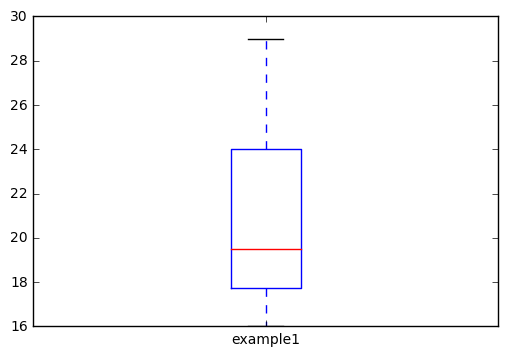

In [19]:
df['example1'].plot(kind='box')

#### Student: Create plots for examples 2 and 3 and check the quartiles

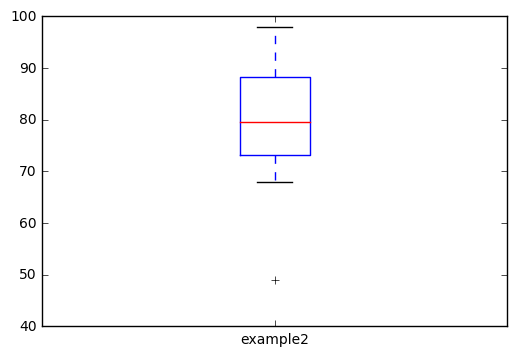

In [20]:
df['example2'].plot(kind='box')

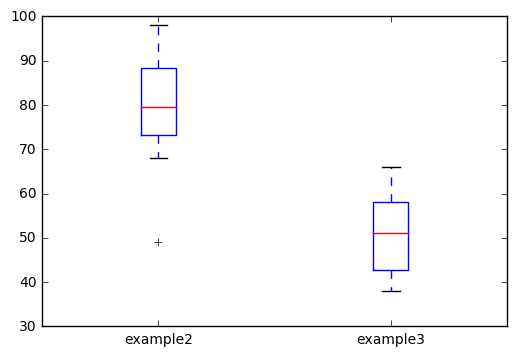

In [25]:
df[['example2','example3']].plot(kind='box')

#### What does the cross in example 2 represent?

Answer: Outlier

### Part 3. Standard deviation and variance

#### In Pandas
	Methods include: 
		.std() - Compute Standard Deviation
		.var() - Compute variance

#### Let's calculate variance by hand first.

<img(src='https://dl.dropboxusercontent.com/u/3404204/samplevarstd.png', style="width: 50%; height: 50%")>

In [26]:
# example1
mean = df["example1"].mean()
n= df["example1"].count()

print "example1:"
print df["example1"], "\n"

print "mean:", mean, "\n"
print "n:", n

example1:
0    18
1    24
2    17
3    21
4    24
5    16
6    29
7    18
Name: example1, dtype: int64 

mean: 20.875 

n: 8


In [27]:
# Written out by hand for instructional purposes 
# If you have time, try refactoring this to create a function to calculate variance for any dataset

# Find the squared distance from the mean
obs0 = (18 - mean) ** 2
obs1 = (24 - mean) ** 2
obs2 = (17 - mean) ** 2
obs3 = (21 - mean) ** 2
obs4 = (24 - mean) ** 2
obs5 = (16 - mean) ** 2
obs6 = (29 - mean) ** 2
obs7 = (18 - mean) ** 2

print obs0, obs1, obs2, obs3, obs4, obs5, obs6, obs7
print

# Sum each observation's squared distance from the mean 
numerator = obs0 + obs1 + obs2 + obs3 + obs4 + obs5 + obs6 +obs7
denominator = n - 1
variance = numerator/denominator
print "numerator:", numerator, "\n"
print "denominator:", denominator, "\n"
print "variance:", variance

8.265625 9.765625 15.015625 0.015625 9.765625 23.765625 66.015625 8.265625

numerator: 140.875 

denominator: 7 

variance: 20.125


In [28]:
# Using pandas
print "Variance"
print df["example1"].var()

Variance
20.125


#### Students: Calculate the standard deviation for each sample

Recall that the standard deviation is the square root of the variance. 

In [34]:
# Find the variance for each dataset
print df.var()

print "example 1 SD =", (20.125 ** 0.5)

example1     20.125000
example2    238.571429
example3    116.125000
dtype: float64
example 1 SD = 4.48608961123


In [30]:
# Calculate standard deviation by hand from the variance of each dataset
def get_sd(x):
    return(sum((x-x.mean())*(x-x.mean())) / (x.count() - 1)) ** 0.5


print get_sd(df.example1)

4.48608961123


In [32]:
# Now do it with pandas!
df.std()

example1     4.486090
example2    15.445758
example3    10.776131
dtype: float64

#### Short Cut!

In [35]:
# We can use describe() method to do lots of things at once:
# gives us count of non-missing values, mean, std dev, min/max + quartiles
df.describe()

,example1,example2,example3
count,8.00000,8.000000,8.000000
mean,20.87500,78.500000,51.125000
std,4.48609,15.445758,10.776131
min,16.00000,49.000000,38.000000
25%,17.75000,73.250000,42.750000
50%,19.50000,79.500000,51.000000
75%,24.00000,88.250000,58.000000
max,29.00000,98.000000,66.000000


#### Student: Check understanding 
Which value in the above table is the median? 

Answer: 

### Part 4. Correlation

In [36]:
# Correlations between example1, example2, and example3 as a correlation matrix
df.corr()

,example1,example2,example3
example1,1.000000,0.477283,-0.123745
example2,0.477283,1.000000,-0.057076
example3,-0.123745,-0.057076,1.000000


In [37]:
# Let's explore this dataset
anscombe = pd.read_csv('anscombe.csv')
anscombe = anscombe.drop('Unnamed: 0', axis=1)  # bit of data munging, we don't need this column so drop it
anscombe

,x,x4,y1,y2,y3,y4
0,10,8,8.04,9.14,7.46,6.58
1,8,8,6.95,8.14,6.77,5.76
2,13,8,7.58,8.74,12.74,7.71
3,9,8,8.81,8.77,7.11,8.84
4,11,8,8.33,9.26,7.81,8.47
5,14,8,9.96,8.10,8.84,7.04
6,6,8,7.24,6.13,6.08,5.25
7,4,19,4.26,3.10,5.39,12.50
8,12,8,10.84,9.13,8.15,5.56
9,7,8,4.82,7.26,6.42,7.91


In [38]:
# Huh, this looks like a weird dataset. Two x columns, four y columns...let's get some more intuition about it
# by looking at the aggregate statistics. Before you read on, what do you notice?
anscombe.describe()

,x,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


When looking at the dataframe, the data looks quite different, but when looking at the output from the `.describe()` call, we notice the columns share some similar features:
- mean(x) = 9, i.e. both x cols have mean of 9
- var(x) = 11, i.e. both x cols have variance of 11 (std dev = sqrt(11) = 3.316625)
- mean(y) = 7.50, i.e. all y columns have mean of 7.50 (or close to it)
- var(y) = 4.12, i.e. all y columns have variance of 4.12 (std dev = sqrt(4.12) = ~2.03)


In [39]:
# Let's check out the correlation matrix to try understand this dataset further
anscombe.corr()

,x,x4,y1,y2,y3,y4
x,1.000000,-0.500000,0.816421,0.816237,0.816287,-0.314047
x4,-0.500000,1.000000,-0.529093,-0.718437,-0.344661,0.816521
y1,0.816421,-0.529093,1.000000,0.750005,0.468717,-0.489116
y2,0.816237,-0.718437,0.750005,1.000000,0.587919,-0.478095
y3,0.816287,-0.344661,0.468717,0.587919,1.000000,-0.155472
y4,-0.314047,0.816521,-0.489116,-0.478095,-0.155472,1.000000


If we were to plot x with y1, y2 and y3; and plot x4 with y4...what can we expect? Well maybe we could look at the correlations of these plots, as well as a fitted line of best fit (a.k.a "linear regression") for each of those:
- corr(x, y) = 0.816 for all plots mentioned above
- linear regression for all plots is `y = 3 + 0.5*x`

From inspecting summary statistics, these look pretty identical. Let's now visualise and inspect further.

Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)
Axes(0.125,0.125;0.775x0.775)


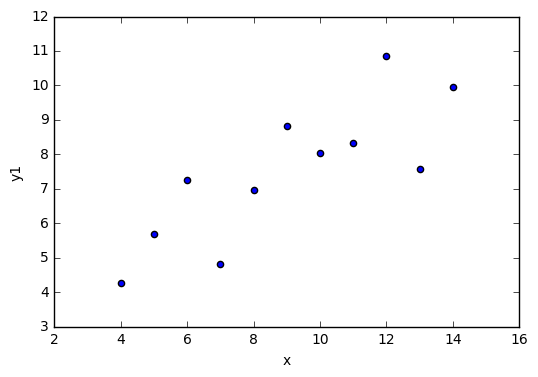

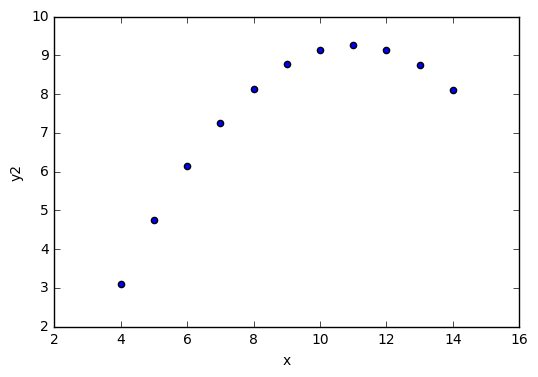

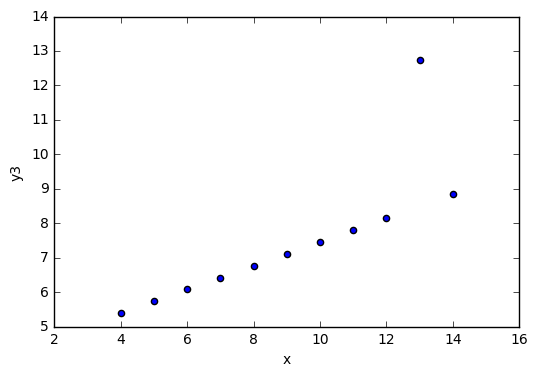

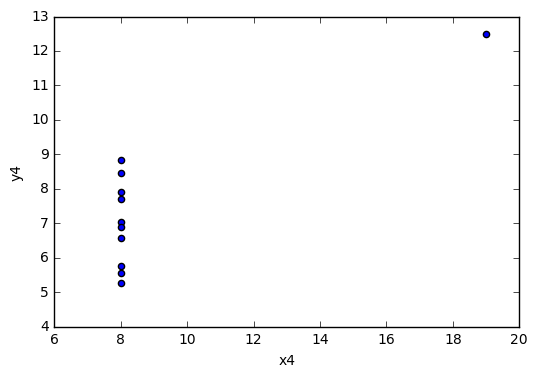

In [40]:
# Visualise
for y in ['y1', 'y2', 'y3', 'y4']:
    if y != 'y4':
        print anscombe.plot(kind='scatter', x='x', y=y)
    else:
        print anscombe.plot(kind='scatter', x='x4', y=y)

Visualising is critical sometimes! Even though ALL four of above plots have equal mean, equal variance, equal correlation, equal regression coefficients...
- `x ~ y1` has a reasonable if slightly noisy relationship between x & y1
- `x ~ y2` has a perfect non-linear (i.e. not a line, i.e. parabolic) relationship between x & y2
- `x ~ y3` has a perfect linear relationship between x & y3, except for one outlier
- `x4 ~ y4` has no relationship between x4 & y4, other than all the x's are 8 except for one rogue point!

These graphs were created in 1973 by statistician Francis Anscombe to demonstrate the importance of graphing data before analyzing it. Read more here: https://en.wikipedia.org/wiki/Anscombe%27s_quartet

---

## Demo: Mean & median

Although the mean and median both give us some sense of the centre of a distribution, they aren't always the same. The *median* gives us a value that **splits the data into two halves** while the *mean* is a **numeric average,** so extreme values can have a significant impact on the mean. 

In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

In [41]:
# First, we'll use a "random seed" to ensure your randomly generated numbers are the same as mine
np.random.seed(12345)

In [42]:
bunch_of_random_but_normally_distributed_numbers = np.random.normal(size=100000)
norm_data = pd.DataFrame(bunch_of_random_but_normally_distributed_numbers)
norm_data.head()

,0
0,-0.204708
1,0.478943
2,-0.519439
3,-0.555730
4,1.965781


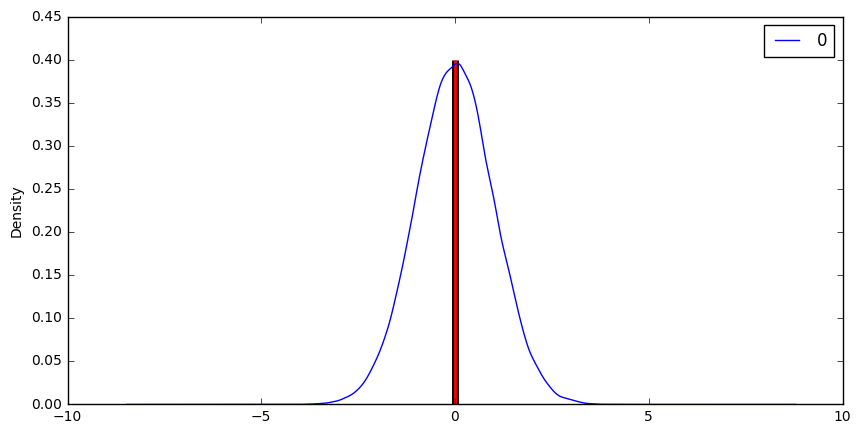

In [43]:
# Visualise
norm_data.plot(kind="density", figsize=(10,5))

plt.vlines(norm_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0)

plt.vlines(norm_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="red")

In the plot above, the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean. 

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:
 

In [44]:
# Generate skewed data from an exponential distribution
skewed_data = pd.DataFrame(np.random.exponential(size=100000))
skewed_data.head()

,0
0,0.539418
1,0.533596
2,1.055088
3,0.022741
4,0.228116


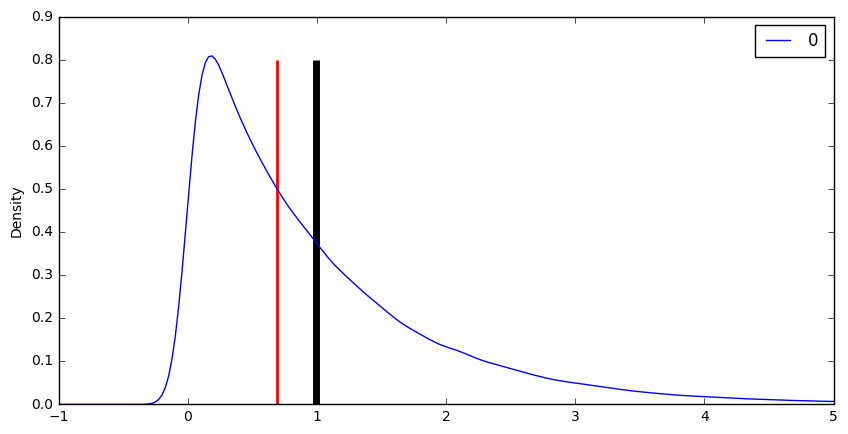

In [45]:
skewed_data.plot(kind="density", figsize=(10,5), xlim=(-1,5))

plt.vlines(skewed_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.8,
           linewidth=5.0)

plt.vlines(skewed_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.8, 
           linewidth=2.0,
           color="red")

Notice that the mean is also influenced heavily by outliers, while the median resists the influence of outliers:

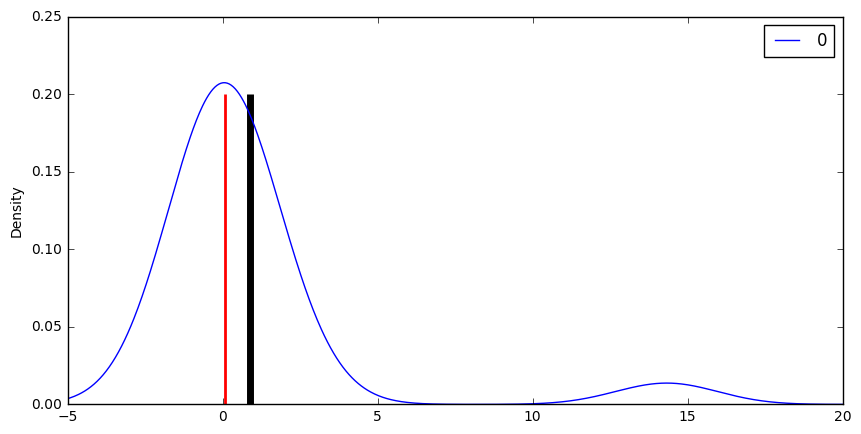

In [46]:
norm_data = np.random.normal(size=50)
some_outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, some_outliers), axis=0))

combined_data.plot(kind="density", figsize=(10,5), xlim=(-5,20))

plt.vlines(combined_data.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.2,
           linewidth=5.0)

plt.vlines(combined_data.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.2, 
           linewidth=2.0,

           color="red")

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. 

The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

---

## Demo: Skewness and Kurtosis
*Skewness* measures the **skew or asymmetry of a distribution** while *Kurtosis* measures the **"peakedness" of a distribution**. 

We won't go into the exact calculations behind these, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean, and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

In [47]:
comp1 = np.random.normal(loc=0, scale=1, size=200) # N(0, 1)
comp2 = np.random.normal(loc=10, scale=2, size=200) # N(10, 4)

df1 = pd.Series(comp1)
df2 = pd.Series(comp2)

In [48]:
print "N(0,1) with 200 variates:\t\t", df1.skew()  # Normal distribution therefore skew is close to zero
print "N(10,2) with 200 variates:\t\t", df2.skew()  # Normal distribution therefore skew is close to zero
print "exponential(1.0) with 100k variates:\t", skewed_data.skew()[0]  # Positively skewed data

N(0,1) with 200 variates:		0.0564216412102
N(10,2) with 200 variates:		0.144359849298
exponential(1.0) with 100k variates:	1.98997589764


In [49]:
print "N(0,1) with 200 variates:\t\t", df1.kurt()  # N(0,1) distribution, kurtosis is close to zero
print "N(10,2) with 200 variates:\t\t", df2.kurt()  # N(10,4) distribution is flatter than N(0,1), therefore lower kurtosis
print "exponential(1.0) with 100k variates:\t", skewed_data.kurt()[0]  # Skewed & peaked, should have higher kurtosis

N(0,1) with 200 variates:		-0.445012433263
N(10,2) with 200 variates:		-0.387210744958
exponential(1.0) with 100k variates:	5.88645829613


#### Example: mtcars

In [50]:
# Let's now use an example dataset (mtcars) from the ggplot library
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


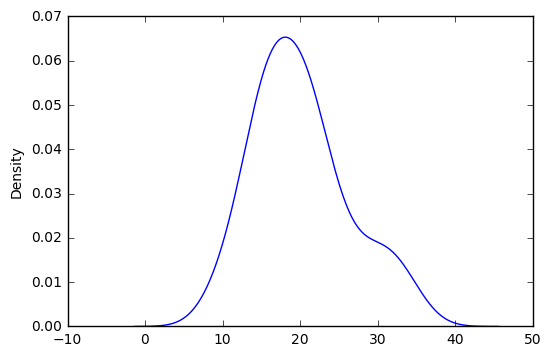

In [51]:
mtcars['mpg'].plot(kind="density")

In [52]:
mtcars["mpg"].describe()  # Check out basic stats

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

In [53]:
mtcars["mpg"].skew()  # Check skewness

0.67237713762908047

In [54]:
mtcars["mpg"].kurt()  # Check kurtosis 

-0.0220062914240855

---

## Demo: Types of distribution
To explore these measures further, let's create some dummy data and inspect it:

In [55]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000) + 2, 
                              np.random.exponential(size=65000)), 
                              axis=0)
uniform_data = np.random.uniform(0, 2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                              np.random.exponential(size=50000) * (-1)),
                              axis=0)

data_df = pd.DataFrame({"norm": norm_data,
                        "skewed": skewed_data,
                        "uniform": uniform_data,
                        "peaked": peaked_data})

data_df.head()

,norm,peaked,skewed,uniform
0,-0.986136,0.207918,3.953092,1.768017
1,-0.432103,3.983584,0.498186,0.622262
2,-1.752715,0.667812,0.724209,1.826520
3,-0.810672,1.001957,2.471665,0.491662
4,0.151794,0.128985,2.048056,1.007796


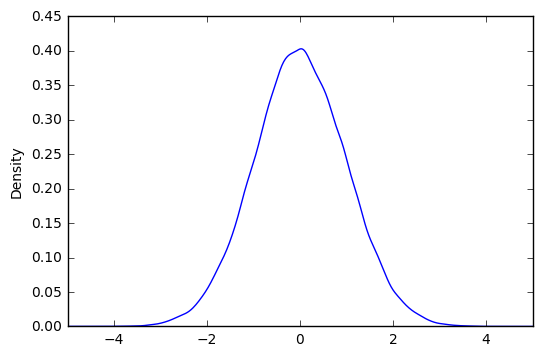

In [56]:
# Visualise the normal distribution
data_df["norm"].plot(kind="density", xlim=(-5,5))

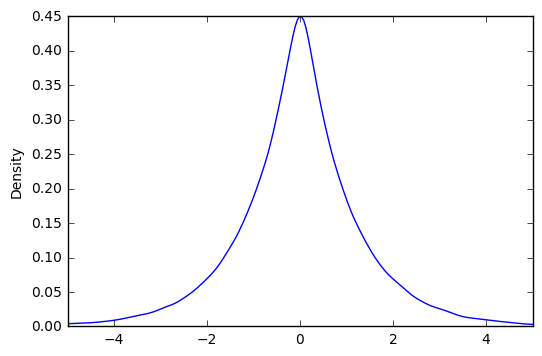

In [57]:
# Visualise the peaked distribution (two exponentials back to back)
data_df["peaked"].plot(kind="density", xlim=(-5,5))

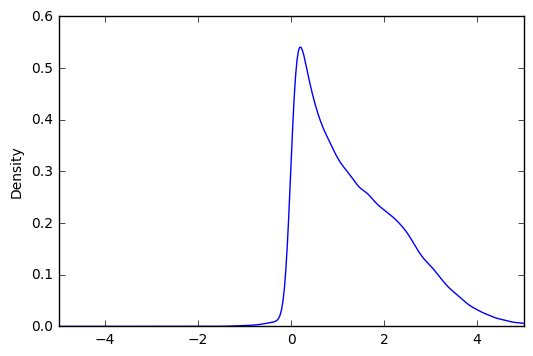

In [58]:
# Visualise the skewed distribution (normal with a bit of exponential)
data_df["skewed"].plot(kind="density", xlim=(-5,5))

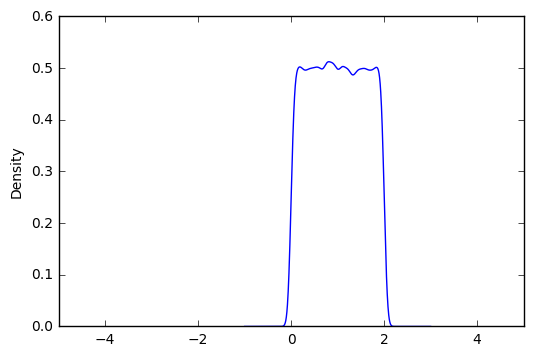

In [59]:
# Visualise the uniform distribution
data_df["uniform"].plot(kind="density", xlim=(-5,5))

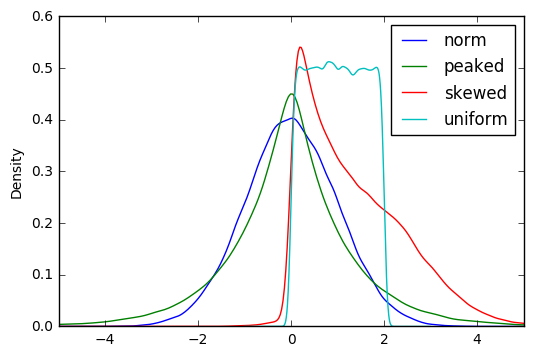

In [60]:
# We can visualise all the columns of the dataframe (i.e. all the distributions) in one go
data_df.plot(kind="density", xlim=(-5,5))

### Skewness
Now let's check the skewness of each of these distributions. 

Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [61]:
data_df.skew()

norm       0.008554
peaked     0.025580
skewed     1.008958
uniform    0.005169
dtype: float64

### Kurtosis
Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution to have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [62]:
data_df.kurt()

norm       0.029006
peaked     3.027858
skewed     1.440851
uniform   -1.197078
dtype: float64

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis, and the two pointier distributions have positive kurtosis.

---

## Demo: Dummy variables
We want to represent categorical variables numerically, but we can't simply code them as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (suggesting that urban is somehow "twice" the suburban category, which doesn't make sense).

Why do we only need **two dummy variables, not three?** Because two dummies capture all of the information about the Area feature, and implicitly defines rural as the reference level.

In general, if you have a categorical feature with k levels, you create k-1 dummy variables.

In [63]:
# read data into a DataFrame
data = pd.read_csv('advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Dummying categorical variables with two categories
Let's create a new feature called "Size," and randomly assign observations to be small or large:

In [64]:
# Reset random seed for reproducibility
np.random.seed(12345)

# Create a Series of booleans in which roughly half are True
nums = np.random.rand(100)
mask_large = nums > 0.5

print "nums:", nums[0:6]
print "mask_large:", mask_large[0:6]

nums: [ 0.92961609  0.31637555  0.18391881  0.20456028  0.56772503  0.5955447 ]
mask_large: [ True False False False  True  True]


In [65]:
# Initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


We will soon encounter scikit-learn. Remember now that scikit-learn requires ALL data to be represented numerically.

If a feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value.

In [66]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small': 0, 'large': 1})  # this is new, can you figure out what .map() is doing?
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


### Dummying categorical variables with more than two categories
Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban:

In [67]:
# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,rural
3,17.2,45.9,69.3,9.3,small,0,suburban
4,151.5,41.3,58.5,18.5,small,0,rural
5,180.8,10.8,58.4,12.9,large,1,rural


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an ordered relationship between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create another dummy variable:

#### Common pattern: create multiple dummy variables using get_dummies(), then exclude the first dummy column
    my_categorical_var_dummies = pd.get_dummies(my_categorical_var, prefix='Area').iloc[:, 1:]

In [87]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# now concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data[:10]

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0.0,0.0
2,44.5,39.3,45.1,10.4,small,0,rural,0.0,0.0
3,17.2,45.9,69.3,9.3,small,0,suburban,1.0,0.0
4,151.5,41.3,58.5,18.5,small,0,rural,0.0,0.0
5,180.8,10.8,58.4,12.9,large,1,rural,0.0,0.0
6,8.7,48.9,75.0,7.2,large,1,suburban,1.0,0.0
7,57.5,32.8,23.5,11.8,large,1,urban,0.0,1.0
8,120.2,19.6,11.6,13.2,large,1,urban,0.0,1.0
9,8.6,2.1,1.0,4.8,large,1,suburban,1.0,0.0
10,199.8,2.6,21.2,10.6,large,1,suburban,1.0,0.0
